In [1]:
import os
%matplotlib inline 
import matplotlib.pyplot as plt #1st usage chap 1
import numpy as np #1st usage chap 1
import pandas as pd #1st usage chap 1
import scipy.stats as stats #1st usage chap 2
from scipy.stats import linregress #1st usage chap 2

# Chapter 1
> Tools are available for data analysis in Python, reviewed
issues related to installation and workflow, and considered a simple example that requires
reading and manipulating data files

In [2]:
plt.style.use('classic')

In [3]:
cols = ['user id', 'item id', 'rating', 'timestamp']
ratings = pd.read_csv('data/ratings.dat', sep='::',index_col=False, names=cols,encoding="UTF-8")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
ratings.head()

,user id,item id,rating,timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639
2,2,104257,8,1364690142
3,2,1259521,8,1364118447
4,2,1991245,7,1364117717


In [5]:
rating_counts = ratings['rating'].value_counts()
rating_counts

8     12012
7     11063
9      7119
6      6373
10     6281
5      3399
4      1696
3       924
1       595
2       533
0         5
Name: rating, dtype: int64

In [6]:
sorted_counts = rating_counts.sort_index()
sorted_counts

0         5
1       595
2       533
3       924
4      1696
5      3399
6      6373
7     11063
8     12012
9      7119
10     6281
Name: rating, dtype: int64

Text(0,0.5,'Count')

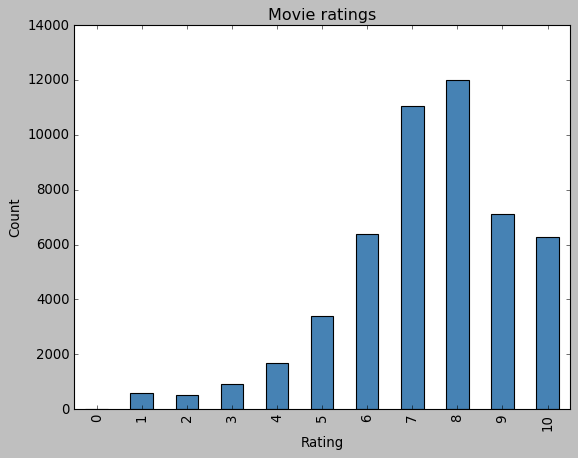

In [7]:
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

**Ratings distribution for a particular movie genre,say "Crime Drama", is similar to the overall distribution.**

In [8]:
cols = ['movie id','movie title','genre']
movies = pd.read_csv('data/movies.dat', sep='::',index_col=False, names=cols,encoding="UTF-8")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [9]:
movies.head()

,movie id,movie title,genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short
2,7264,The Rink (1916),Comedy|Short
3,8133,The Immigrant (1917),Short|Comedy|Drama|Romance
4,9968,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance


In [10]:
cridra=movies[movies['genre']=='Crime|Drama']

In [11]:
is_cridra = movies['genre']== 'Crime|Drama'
is_cridra.head()

0     True
1    False
2    False
3    False
4    False
Name: genre, dtype: bool

In [12]:
cridra_ids=cridra['movie id']
cridra_ids.head()

0       2844
54     23817
208    40522
236    42876
251    44515
Name: movie id, dtype: int64

In [13]:
criterion = ratings['item id'].map(lambda x: (cridra_ids == x).any())
cridra_ratings = ratings[criterion]
cridra_ratings.head()

,user id,item id,rating,timestamp
128,18,86066,10,1363985505
150,23,1212450,8,1364166586
176,26,1817273,8,1367761386
194,36,68646,9,1364834910
195,36,71562,10,1365005772


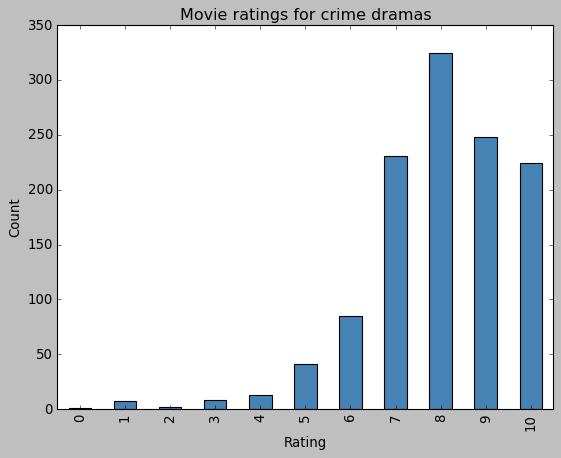

In [14]:
rating_counts = cridra_ratings['rating'].value_counts()
sorted_counts = rating_counts.sort_index()
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings for crime dramas')
plt.xlabel('Rating')
plt.ylabel('Count');

# Chapter 2
> How to use Pandas to perform an initial exploration of the data.
> Displays of data, including histograms, KDE plots and boxplots forunivariate distributions, and scatterplots for bivariate relationships.
> Summaries of data, including mean, standard deviation, range, median, quartiles, and
percentiles.

In [15]:
gss_data = pd.read_stata('data/GSS2012merged_R5.dta', convert_categoricals=False)
gss_data.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,1,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,3,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,4,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
gss_data.set_index('id')
gss_data.drop('id', 1, inplace=True)
gss_data.head()

,year,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,marital,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
gss_data.to_csv('data/GSS2012merged.csv')

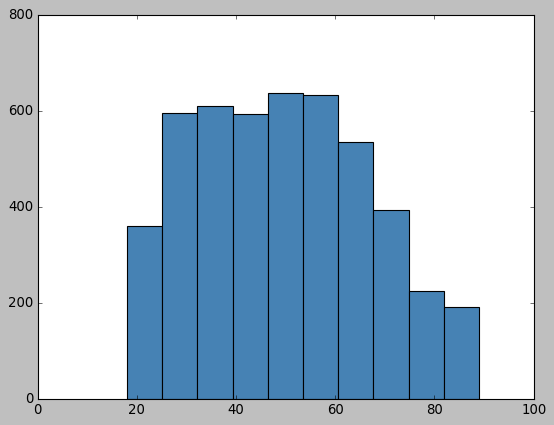

In [18]:
gss_data['age'].hist(color='SteelBlue')
plt.grid()
plt.locator_params(nbins=5)

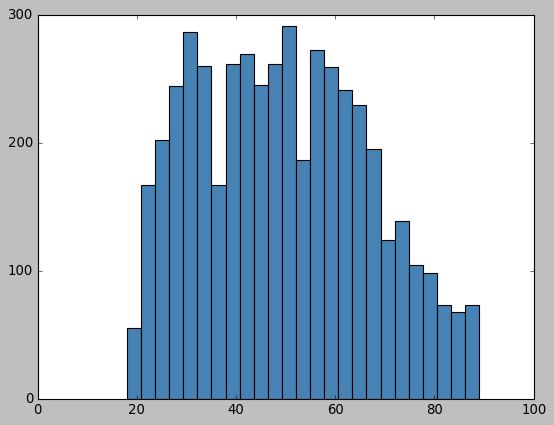

In [19]:
gss_data['age'].hist(bins=25, color='SteelBlue')
plt.grid()
plt.locator_params(nbins=5)

In [20]:
inc_age = gss_data[['realrinc','age']]
inc_age.head(10)

,realrinc,age
0,NaN,22.0
1,NaN,21.0
2,58800.0,42.0
3,NaN,49.0
4,NaN,70.0
5,NaN,50.0
6,NaN,35.0
7,NaN,24.0
8,NaN,28.0
9,15925.0,28.0


In [21]:
inc_age = gss_data[['realrinc','age']].dropna()
inc_age.head(10)

,realrinc,age
2,58800.0,42.0
9,15925.0,28.0
11,3185.0,36.0
14,7962.5,52.0
15,26950.0,35.0
16,26950.0,36.0
17,22050.0,47.0
18,33075.0,55.0
22,33075.0,54.0
23,49000.0,45.0


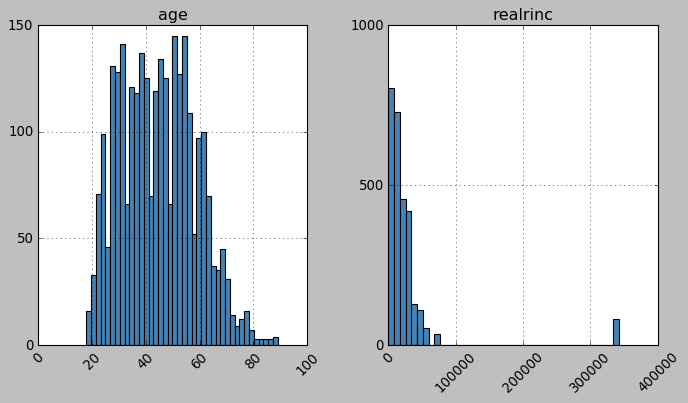

In [22]:
ax_list = inc_age.hist(bins=40, figsize=(10,5), xrot=45, color='SteelBlue')
for ax in ax_list[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [23]:
inc_age[inc_age['realrinc'] > 3.0E5].count()

realrinc    80
age         80
dtype: int64

In [24]:
inc_age[inc_age['realrinc'] >3.0E5].head(10)

,realrinc,age
42,341672.3793,51.0
43,341672.3793,57.0
44,341672.3793,44.0
47,341672.3793,68.0
54,341672.3793,46.0
126,341672.3793,53.0
241,341672.3793,61.0
261,341672.3793,55.0
263,341672.3793,43.0
401,341672.3793,37.0


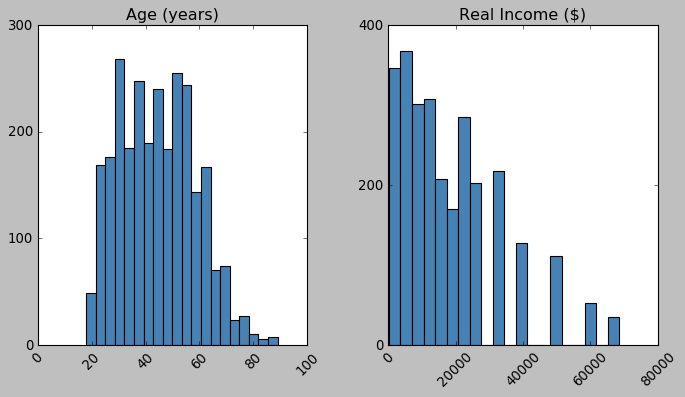

In [25]:
lowinc_age = inc_age[inc_age['realrinc'] <3.0E5]
ax_list = lowinc_age.hist(bins=20, figsize=(10,5), xrot=45, color='SteelBlue')
ax1, ax2 = ax_list[0]
ax1.set_title('Age (years)')
ax2.set_title('Real Income ($)')
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x' ,nbins=6)
    ax.locator_params(axis='y' ,nbins=3)

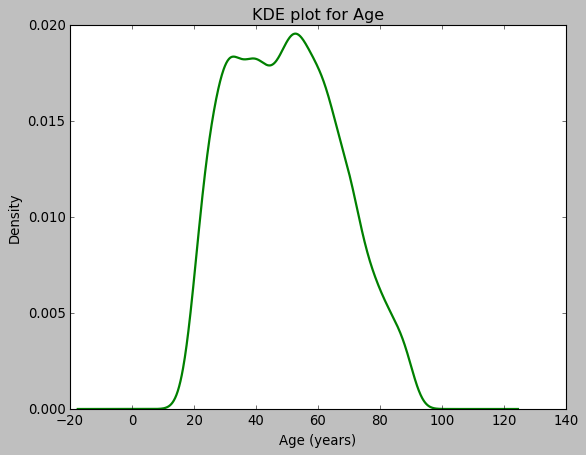

In [26]:
age = gss_data['age'].dropna()
age.plot(kind='kde', lw=2, color='green')
plt.title('KDE plot for Age')
plt.xlabel('Age (years)');

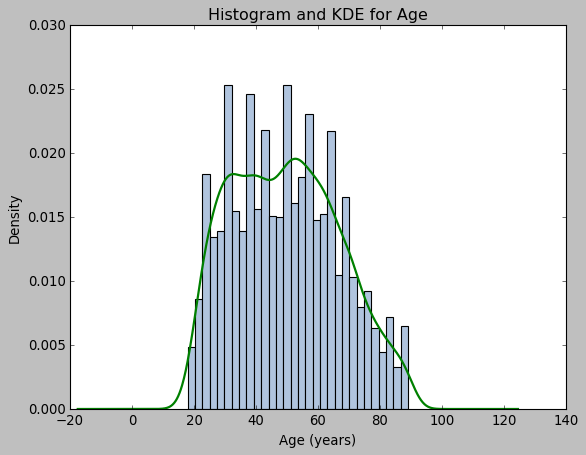

In [27]:
ax = age.hist(bins=30, color='LightSteelBlue', density=True)
age.plot(kind='kde', lw=2, color='Green', ax=ax)
plt.title('Histogram and KDE for Age')
plt.xlabel('Age (years)');

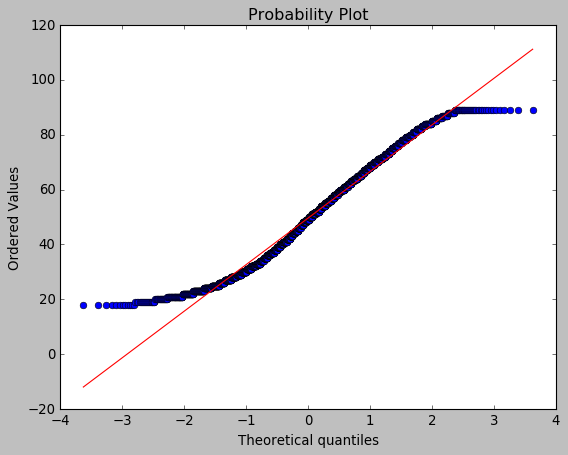

In [28]:
stats.probplot(age, dist='norm', plot=plt);

In [29]:
inc = gss_data['realrinc'].dropna()
lowinc = inc[inc <3.0E5]
lowinc.describe(percentiles=np.arange(0, 1.0, 0.1))

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
0%         245.000000
10%       2695.000000
20%       5512.500000
30.0%     9187.500000
40%      11637.500000
50%      15925.000000
60.0%    18375.000000
70%      22050.000000
80%      26950.000000
90%      40425.000000
max      68600.000000
Name: realrinc, dtype: float64

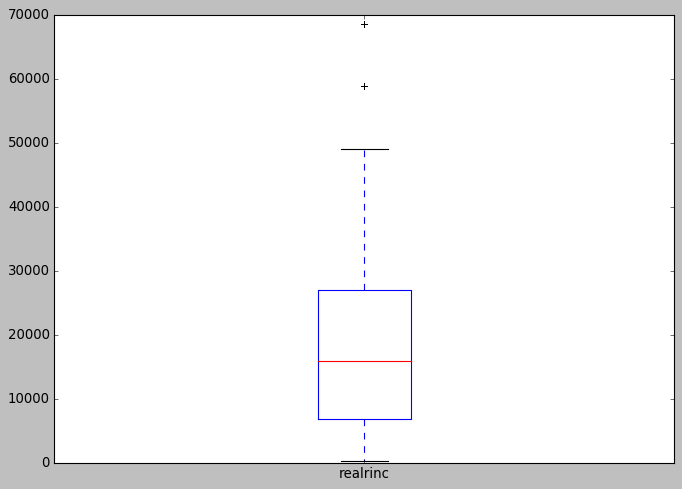

In [30]:
lowinc.plot(kind='box', figsize=(10,7));#Histogram+kind='hist' ; KDE=kind='kde'

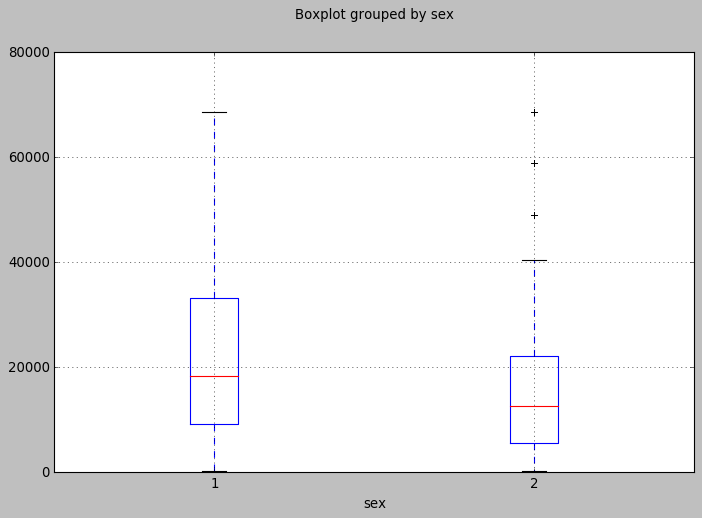

In [31]:
inc_gen = gss_data[['realrinc','sex']]
inc_gen = inc_gen[inc_gen['realrinc'] < 3.0E5]
inc_gen.boxplot(column='realrinc', by='sex',figsize=(10,7))
plt.title('')
plt.locator_params(nbins=5);

In [32]:
hubble_data = pd.read_csv('data/hubble.csv', skiprows=2, names=['id', 'r', 'v'])
hubble_data.head()

,id,r,v
0,SMC,0.032,170
1,5194,0.500,270
2,1055,1.100,450
3,LMC,0.034,290
4,4449,0.630,200


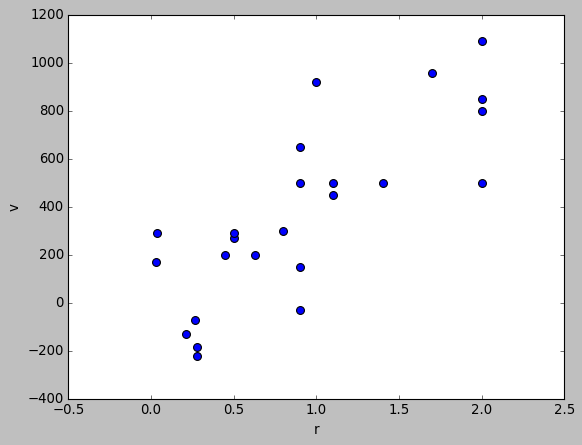

In [33]:
hubble_data.plot(kind='scatter', x='r',y='v', s=50);

In [34]:
rv = hubble_data.as_matrix(columns=['r','v'])
a, b, r, p, stderr = linregress(rv)
print(a, b, r, p, stderr)

454.15844092262836 -40.78364909586037 0.7896394879353182 4.477491000609172e-06 75.23710534716909


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


> a: This is the slope of the regression line
b: This is the intercept of the regression line
r: This is the correlation coefficient
p: This is the two-sided p-value for the hypotheses test-for the null hypothesis that
assumes the slope is zero
stderr: This is the standard error of the estimate

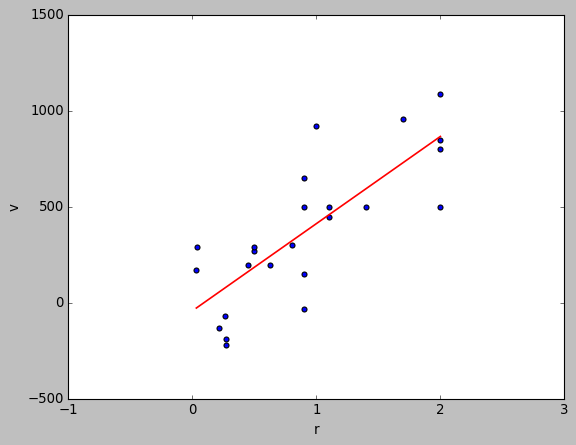

In [35]:
hubble_data.plot(kind='scatter', x='r', y='v')
rdata = hubble_data['r']
rmin, rmax = min(rdata), max(rdata)
rvalues = np.linspace(rmin, rmax, 200)
yvalues = a * rvalues + b
plt.plot(rvalues, yvalues, color='red', lw=1.5)
plt.locator_params(nbins=5);

# Chapter 3